In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('../python')
from pyStatKs import prepareDataC
pDC=prepareDataC("all",readUsingTK=False)
pDC.prepareData()

data preparation finished.
we have found, read and processed the following datasets:
following seasons for delta values: 
[2010, 2011, 2012, 2013, 2014, 2015, 2016]
following seasons for summed values: 
[2010, 2011, 2012, 2013, 2014, 2015, 2016]


Now as the data is stored in the pDC instance of the data preparation class, we can initialize the Neural Network class. The data is transferred by the AnalysisC class, which interconnects the data analysis classes.

In [31]:
from pyStatKs import AnalysisC, NeuralNetworkAnalysisC
aNC=AnalysisC(pDC)

AnalysisC class instance successfully initialized!


In [106]:
nNC=NeuralNetworkAnalysisC(aNC)

In [107]:
nNC.SetCurrentlyAnalyzedDataSetDict(0)

In [108]:
nNC.SetupNNDataMatchup("NYI","NYR")

Finished the preparation of input data for Neural Network.
The input dataset contains 34 samples 
We have 34 input datasets and one output dataset


In [109]:
nNC.PrepareNNInputData(0.3)

Training data prepared: 
Number of training patterns: 24
Number of testing datasets: 10
Input and output dimensions: 61
First sample:
Input data: [ 0.41666667  0.66666667  1.          3.          8.          2.        ]
Output data: [ 0.]


In [168]:
nNC.SetNoHiddenNeuronLayersMinMax(1,3)
nNC.SetHiddenNeuronsAsMultipleOfInputNeurons(4)

In [177]:
noHiddenNeuronsPerLayer=nNC.GetHiddenNeuronsAsMultipleOfInputNeurons()
numberOfHiddenLayers=2
nNC.SetupNeuralNetwork(numberOfHiddenLayers,noHiddenNeuronsPerLayer)

SetupNeuralNetwork: add 6 layers for input
SetupNeuralNetwork: add 2 hidden layers 
SetupNeuralNetwork: add 24 hidden layer neurons 
SetupNeuralNetwork: add 1 output neurons 
add hidden connection: add <FullConnection 'FullConnection-220': 'SigmoidLayer-221' -> 'SigmoidLayer-222'>
Finished setup of a feed forward neural network with 2 hidden layers and 24 neurons in the hidden layers.


Now let's plot the layout of the neural network using the PlotNeuralNetwork class, which uses the NetworkX module.

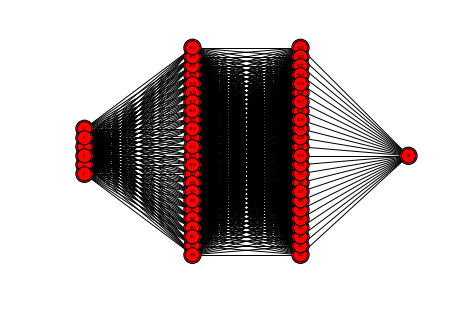

In [178]:
nNC.PlotNeuralNetwork();

In [15]:
[nNC._outNNEstimateList,nNC._outNNActual,nNC._errNNPrct]=nNC.RunNeuralNetwork()

The neuronal network predicted 70.0 % of the test data correctly


The best dataset so far predicted  [ 20.] % of the data right!


ValueError: x and y can be no greater than 2-D

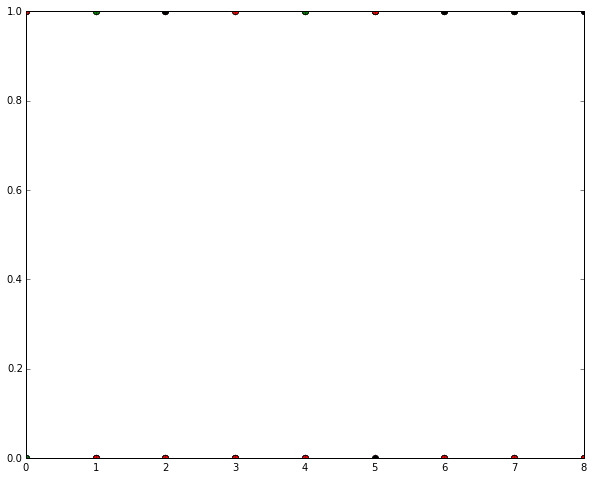

In [182]:
plt.figure(num=None, figsize=(10, 8))
print "The best dataset so far predicted ",nNC._errNNPrct[0],"% of the data right!"
errorList=[]
for (estimate,actual) in zip(nNC._outNNEstimateList,nNC._outNNActual):
    if estimate==actual:
        errorList.append(np.nan)
    else:
        errorList.append(actual)
plt.plot(nNC._outNNEstimateList,'o', label='estimated data')
plt.plot(nNC._outNNActual, label='actual game data')
plt.plot(errorList,"x",markersize=20, label='failed prediction')
plt.xlabel("number of data set")
plt.ylabel("win=1/loss=0")
plt.legend(fontsize=20)
axes = plt.gca()
axes.set_ylim([-0.4,1.9])
axes.set_xlim([-1,len(nNC._outNNActual)+1]);
for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels() + axes.get_yticklabels()):
    item.set_fontsize(20)

In [180]:
nNC._outNNEstimateList=[]
nNC._outNNActual=[]
nNC._errNNPrct=[]
for noNeuronsInHiddenLayer in range(1,nNC._NONEURONSHIDDENLAYER_MULTIPLE_OF_INPUT_NEURONS+1):
    for nohiddenLayers in range(nNC._NOHIDDENLAYERSMIN,nNC._NOHIDDENLAYERSMAX+1):
    #setup of the new neural network
        nNC.SetupNeuralNetwork(nohiddenLayers,noNeuronsInHiddenLayer)
        [tmp1,tmp2,tmp3]=nNC.RunNeuralNetwork()
        nNC._outNNEstimateList.append(tmp1)
        nNC._outNNActual.append(tmp2)
        nNC._errNNPrct.append(tmp3)
        print "****************"

Finished setup of a feed forward neural network with 1 hidden layers and 6 neurons in the hidden layers.
The neuronal network predicted 20.0 % of the test data correctly
****************
Finished setup of a feed forward neural network with 2 hidden layers and 6 neurons in the hidden layers.
The neuronal network predicted 40.0 % of the test data correctly
****************
Finished setup of a feed forward neural network with 3 hidden layers and 6 neurons in the hidden layers.
The neuronal network predicted 20.0 % of the test data correctly
****************
Finished setup of a feed forward neural network with 1 hidden layers and 12 neurons in the hidden layers.
The neuronal network predicted 10.0 % of the test data correctly
****************
Finished setup of a feed forward neural network with 2 hidden layers and 12 neurons in the hidden layers.
The neuronal network predicted 50.0 % of the test data correctly
****************
Finished setup of a feed forward neural network with 3 hidden l

The best dataset so far predicted  60.0 % of the data right!


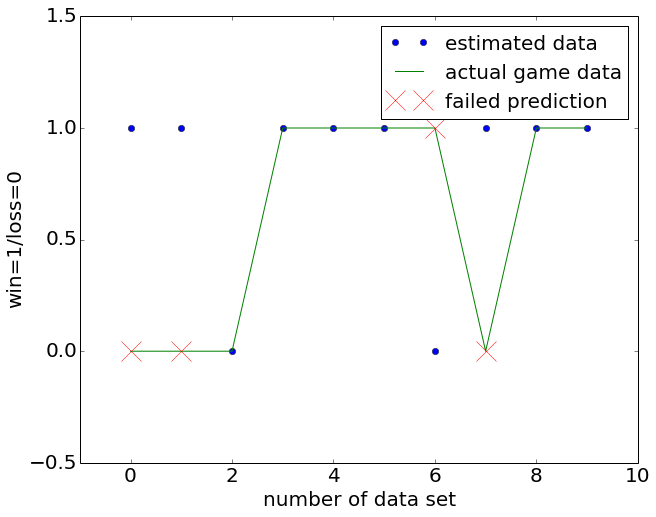

In [181]:
plt.figure(num=None, figsize=(10, 8))
mIndex=nNC._errNNPrct.index(max(nNC._errNNPrct))
print "The best dataset so far predicted ",nNC._errNNPrct[mIndex][0],"% of the data right!"
errorList=[]
for (estimate,actual) in zip(nNC._outNNEstimateList[mIndex],nNC._outNNActual[mIndex]):
    if estimate==actual:
        errorList.append(np.nan)
    else:
        errorList.append(actual)
plt.plot(nNC._outNNEstimateList[mIndex],'o', label='estimated data')
plt.plot(nNC._outNNActual[mIndex], label='actual game data')
plt.plot(errorList,"x",markersize=20, label='failed prediction')
plt.xlabel("number of data set")
plt.ylabel("win=1/loss=0")
plt.legend(fontsize=20)
axes = plt.gca()
axes.set_ylim([-0.4,1.5])
axes.set_xlim([-1,len(nNC._outNNActual)+1]);
for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels() + axes.get_yticklabels()):
    item.set_fontsize(20)